

im

Este notebook aplica os conceitos abordados na Unidade Curricular de **Inteligência Artificial**, no sexto semestre do curso de **Sistemas de Informação** na **Universidade Anhembi Morumbi**, em 2---
#Objetivo

O objetivo deste notebook é explorar técnicas de **programação**, **inteligência artificial** e **processamento de dados**, aplicadas ao contexto do marketing bancário. Além disso, abordaremos **estratégias de manipulação e análise de dados** para oferecer insights relevantesetor.

---



# Analise e Pre Processamento de Dados 


In [94]:
import pandas as pd

In [95]:
df = pd.read_csv('marketing_bancario.csv', sep=';')
display(df)

,Idade,Profissao,Est_Civil,Formacao,cred_automatico,fin_casa,emprestimo,ult_contato,dia_da_semana,duracao,num_contatos,n_dias_pass,Anterior,res_ult_camp_mark,taxa_de_empregabilidade,ind_preco_consumidor,ind_conf_consumidor,num_empregados,dep_resultado
0,56,Domestica,casado,basico,nao,nao,nao,telefone,seg,261,1,999,0,nao existente,1.1,93.994,-36.4,5191.0,nao
1,57,servicos,casado,medio,nao informado,nao,nao,telefone,seg,149,1,999,0,nao existente,1.1,93.994,-36.4,5191.0,nao
2,37,servicos,casado,medio,nao,sim,nao,telefone,seg,226,1,999,0,nao existente,1.1,93.994,-36.4,5191.0,nao
3,40,admin,casado,basico,nao,nao,nao,telefone,seg,151,1,999,0,nao existente,1.1,93.994,-36.4,5191.0,nao
4,56,servicos,casado,medio,nao,nao,sim,telefone,seg,307,1,999,0,nao existente,1.1,93.994,-36.4,5191.0,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,aposentado,casado,tecnico,nao,sim,nao,celular,sex,334,1,999,0,nao existente,-1.1,94.767,-50.8,4963.6,sim
41184,46,Bracal,casado,tecnico,nao,nao,nao,celular,sex,383,1,999,0,nao existente,-1.1,94.767,-50.8,4963.6,nao
41185,56,aposentado,casado,superior,nao,sim,nao,celular,sex,189,2,999,0,nao existente,-1.1,94.767,-50.8,4963.6,nao
41186,44,tecnico,casado,tecnico,nao,nao,nao,celular,sex,442,1,999,0,nao existente,-1.1,94.767,-50.8,4963.6,sim


## Aplicando Label Encoded 

In [97]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [98]:
le = LabelEncoder()
df = df.apply(le.fit_transform)


In [99]:
display(df)

,Idade,Profissao,Est_Civil,Formacao,cred_automatico,fin_casa,emprestimo,ult_contato,dia_da_semana,duracao,num_contatos,n_dias_pass,Anterior,res_ult_camp_mark,taxa_de_empregabilidade,ind_preco_consumidor,ind_conf_consumidor,num_empregados,dep_resultado
0,39,1,1,3,1,1,1,1,2,261,0,26,0,1,8,18,16,8,0
1,40,10,1,5,3,1,1,1,2,149,0,26,0,1,8,18,16,8,0
2,20,10,1,5,1,4,1,1,2,226,0,26,0,1,8,18,16,8,0
3,23,3,1,3,1,1,1,1,2,151,0,26,0,1,8,18,16,8,0
4,39,10,1,5,1,1,4,1,2,307,0,26,0,1,8,18,16,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,4,1,9,1,4,1,0,3,334,0,26,0,1,5,25,0,0,1
41184,29,0,1,9,1,1,1,0,3,383,0,26,0,1,5,25,0,0,0
41185,39,4,1,8,1,4,1,0,3,189,1,26,0,1,5,25,0,0,0
41186,27,11,1,9,1,1,1,0,3,442,0,26,0,1,5,25,0,0,1


## Avaliando a importancia das colunas com Random forest



In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### Separação de variaveis dependentes de variaveis independentes

- **Variaveis Dependentes (features):**
- **ariaveis Independentes (target) :**

  **numpy:** usaremos para trabalhar com arras
  **sklearn.model_selection.train_test_split** é usado para separar conjuntos de dados de treino e teste

In [103]:
print(df.columns)

Index(['Idade', 'Profissao', 'Est_Civil', 'Formacao', 'cred_automatico',
       'fin_casa', 'emprestimo', 'ult_contato', 'dia_da_semana', 'duracao',
       'num_contatos', 'n_dias_pass', 'Anterior', 'res_ult_camp_mark',
       'taxa_de_empregabilidade', 'ind_preco_consumidor',
       'ind_conf_consumidor', 'num_empregados', 'dep_resultado'],
      dtype='object')


In [104]:
X = np.asarray(df[['Idade', 'Profissao', 'Est_Civil', 'Formacao', 'cred_automatico',
       'fin_casa', 'emprestimo', 'ult_contato', 'dia_da_semana', 'duracao',
       'num_contatos', 'n_dias_pass', 'Anterior', 'res_ult_camp_mark',
       'taxa_de_empregabilidade', 'ind_preco_consumidor',
       'ind_conf_consumidor', 'num_empregados']])
y = np.asanyarray(df[['dep_resultado']])

### Separação aleatoria de amostras de treinamento e teste

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, shuffle= True)

### aplicando Random Forest

In [108]:
column_names = list(df.columns.values)
feature_names = [f"{column_names[i]}" for i in range(X.shape[1])]

In [109]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

C:\Users\games\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

### Tempo

In [111]:
import time

In [112]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.018 seconds


In [113]:
import matplotlib.pyplot as plt

### Gráfico de análise da importância das Features

Text(0, 0.5, 'Média de Decréscimo das Impurezas')

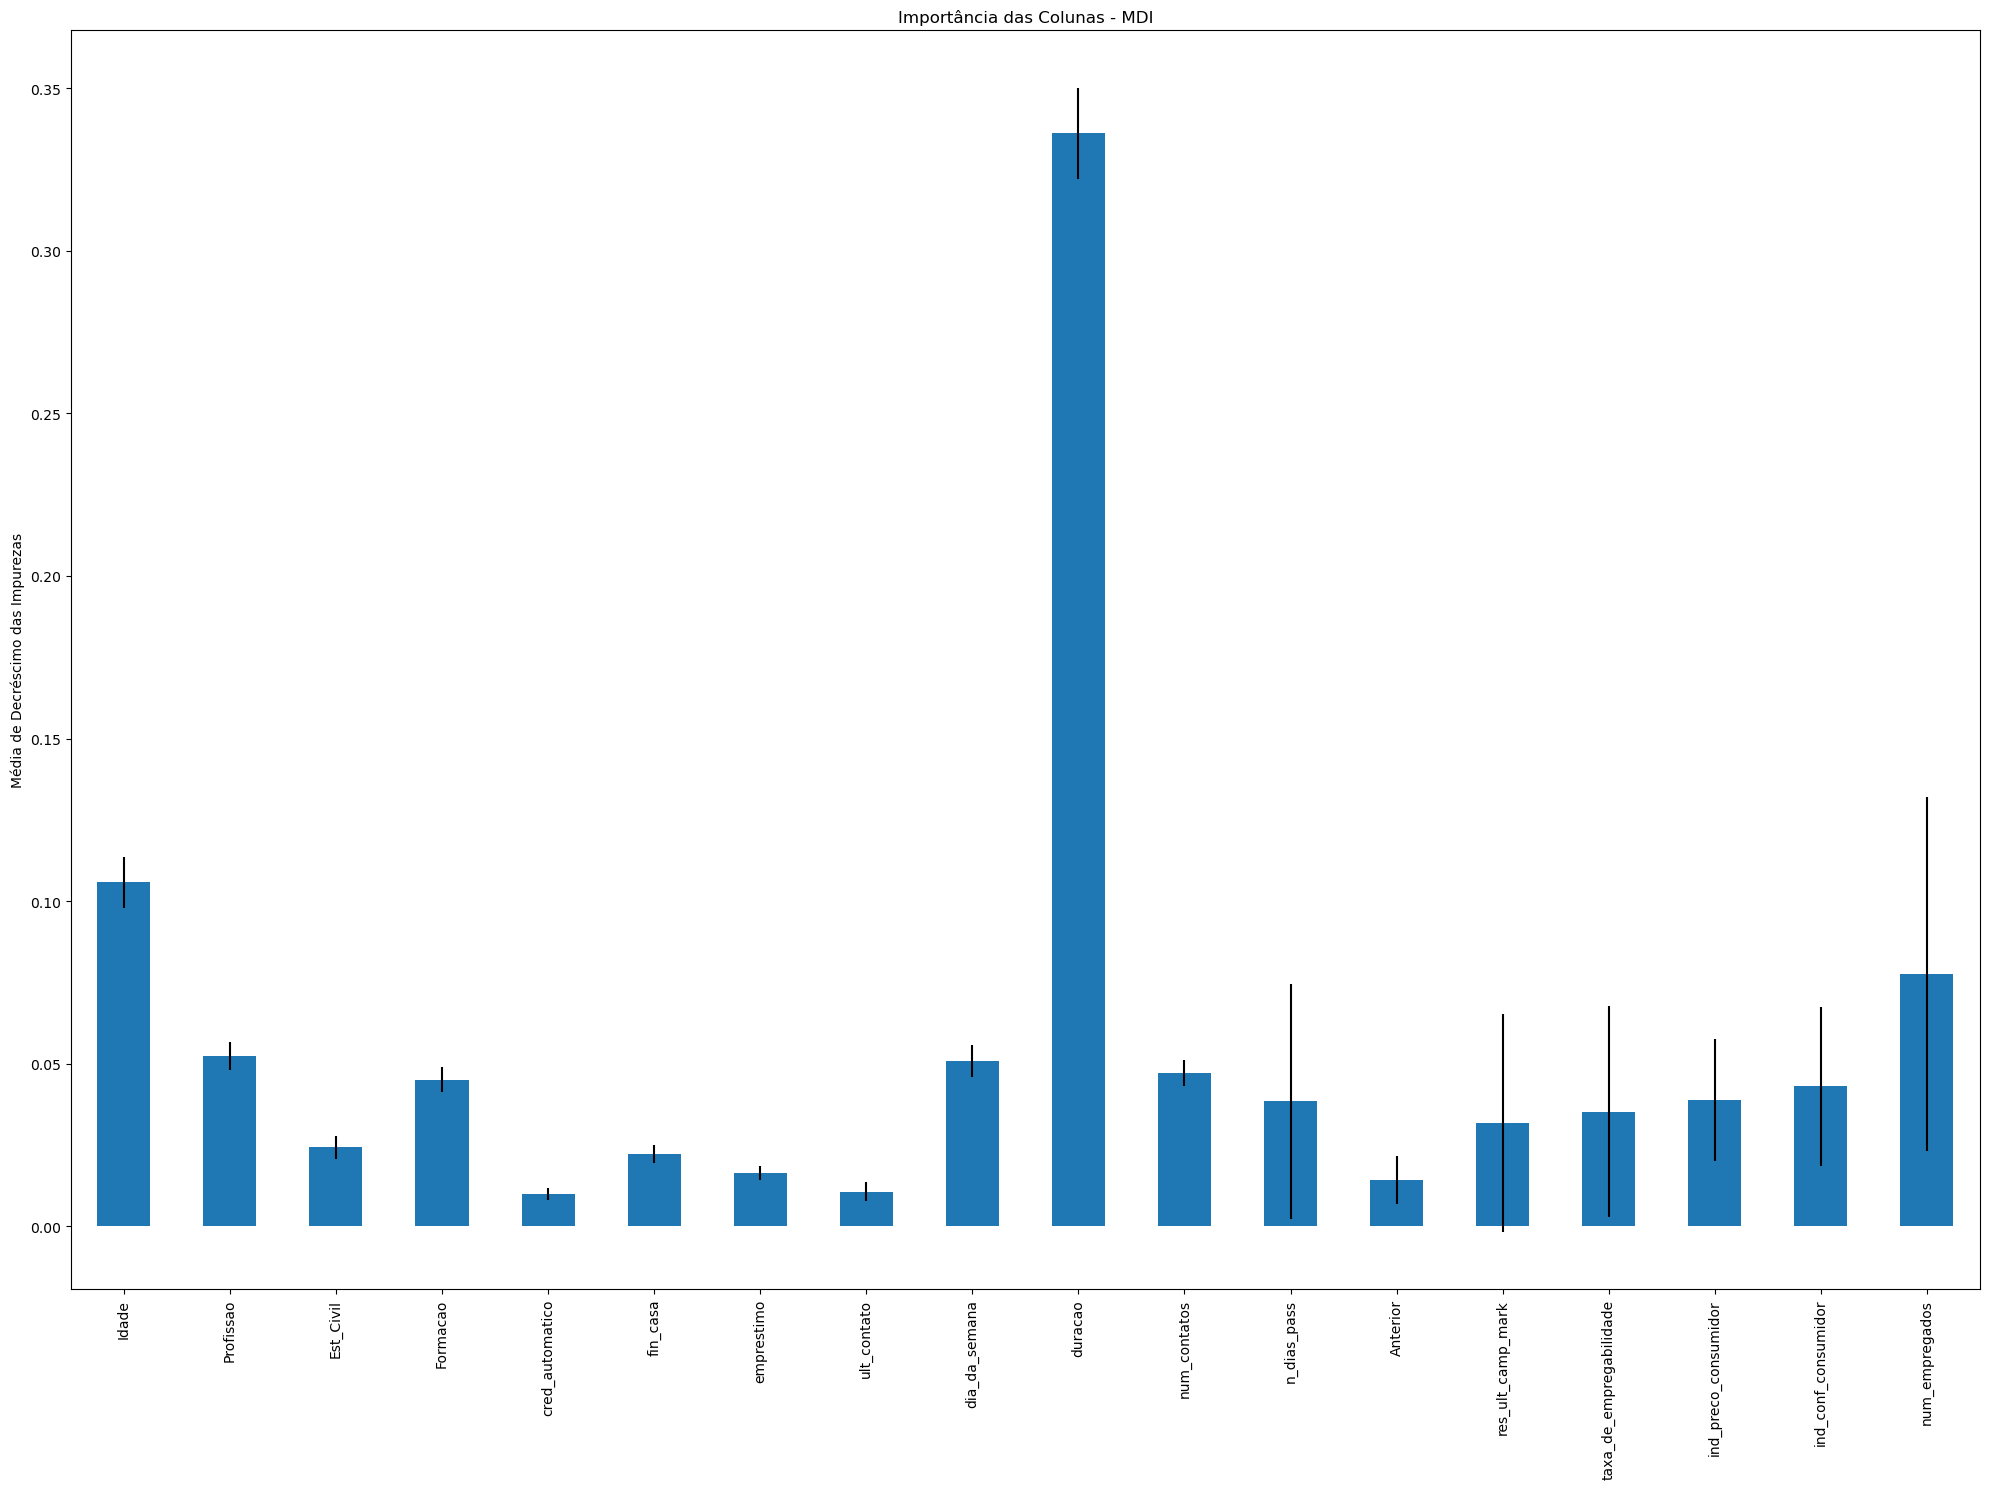

In [115]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Importância das Colunas - MDI")
ax.set_ylabel("Média de Decréscimo das Impurezas")

In [116]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

### Separando colunas categoricas
___
- Variaveis categoricas
   - *Variaveis Categoricas* são variaveis que reoresentam rótulos disccretos ou categorias
       - Elas representam **Caracteristicas Qualitativas** e podem ser divididas em gruopos ou categorias **Sem qualquer tipo de ordem ou relação quantitativa entre elas**
---
- Transformando colunas variaveis categoricas em variaveis numericas
    - Esse codigo transforma a colunas categoricas em colunas binarias. cada valor unico de uma categoria é convertido para 0 ou 1
---
| **handle_unknown='ignore'** significa que se houver valores categoricos desconhecidos nos dados de teste, serão ignorados ao inves dee causar erro, o argumento garante que todas as outras colunas do DataFrame original sejam mantidas sem alterações.

| **make_column_transformer** Combina diferentes transformadores para aplicar em diferentes colunas.

---

In [118]:
categoric_columns = ['Profissao','cred_automatico','emprestimo','fin_casa']

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categoric_columns),
    remainder ='passthrough'
)

- Aplicando a transformação de dados
    - resulta em um array onde
        - as colunas categoricas foram convertidas em varias colunas One-Hot
        - as demais foram mantidas
    

In [120]:
oh_df = one_hot_enc.fit_transform(df)

In [121]:
df = pd.DataFrame(oh_df, columns=one_hot_enc.get_feature_names_out())
display(df)

,onehotencoder__Profissao_0,onehotencoder__Profissao_1,onehotencoder__Profissao_2,onehotencoder__Profissao_3,onehotencoder__Profissao_4,onehotencoder__Profissao_5,onehotencoder__Profissao_6,onehotencoder__Profissao_7,onehotencoder__Profissao_8,onehotencoder__Profissao_9,...,remainder__duracao,remainder__num_contatos,remainder__n_dias_pass,remainder__Anterior,remainder__res_ult_camp_mark,remainder__taxa_de_empregabilidade,remainder__ind_preco_consumidor,remainder__ind_conf_consumidor,remainder__num_empregados,remainder__dep_resultado
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,261.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,8.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,149.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,8.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,226.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,8.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,151.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,8.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,307.0,0.0,26.0,0.0,1.0,8.0,18.0,16.0,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,334.0,0.0,26.0,0.0,1.0,5.0,25.0,0.0,0.0,1.0
41184,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,383.0,0.0,26.0,0.0,1.0,5.0,25.0,0.0,0.0,0.0
41185,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,189.0,1.0,26.0,0.0,1.0,5.0,25.0,0.0,0.0,0.0
41186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,442.0,0.0,26.0,0.0,1.0,5.0,25.0,0.0,0.0,1.0


In [122]:
print(df.columns)

Index(['onehotencoder__Profissao_0', 'onehotencoder__Profissao_1',
       'onehotencoder__Profissao_2', 'onehotencoder__Profissao_3',
       'onehotencoder__Profissao_4', 'onehotencoder__Profissao_5',
       'onehotencoder__Profissao_6', 'onehotencoder__Profissao_7',
       'onehotencoder__Profissao_8', 'onehotencoder__Profissao_9',
       'onehotencoder__Profissao_10', 'onehotencoder__Profissao_11',
       'onehotencoder__cred_automatico_0', 'onehotencoder__cred_automatico_1',
       'onehotencoder__cred_automatico_2', 'onehotencoder__cred_automatico_3',
       'onehotencoder__cred_automatico_4', 'onehotencoder__emprestimo_0',
       'onehotencoder__emprestimo_1', 'onehotencoder__emprestimo_2',
       'onehotencoder__emprestimo_3', 'onehotencoder__emprestimo_4',
       'onehotencoder__fin_casa_0', 'onehotencoder__fin_casa_1',
       'onehotencoder__fin_casa_2', 'onehotencoder__fin_casa_3',
       'onehotencoder__fin_casa_4', 'remainder__Idade', 'remainder__Est_Civil',
       'remainde

In [123]:
X = np.asarray(df[['onehotencoder__Profissao_0', 'onehotencoder__Profissao_1',
       'onehotencoder__Profissao_2', 'onehotencoder__Profissao_3',
       'onehotencoder__Profissao_4', 'onehotencoder__Profissao_5',
       'onehotencoder__Profissao_6', 'onehotencoder__Profissao_7',
       'onehotencoder__Profissao_8', 'onehotencoder__Profissao_9',
       'onehotencoder__Profissao_10', 'onehotencoder__Profissao_11','remainder__Idade',
       'remainder__Formacao', 'remainder__duracao',
       'remainder__num_contatos', 'remainder__n_dias_pass',
       'remainder__taxa_de_empregabilidade', 'remainder__ind_preco_consumidor',
       'remainder__ind_conf_consumidor', 'remainder__num_empregados']])
y = np.asanyarray(df[['remainder__dep_resultado']])

## Analise do balanceeamento de dados

C:\Users\games\AppData\Local\Temp\ipykernel_2616\629556745.py:3: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['remainder__dep_resultado']).plot.bar()


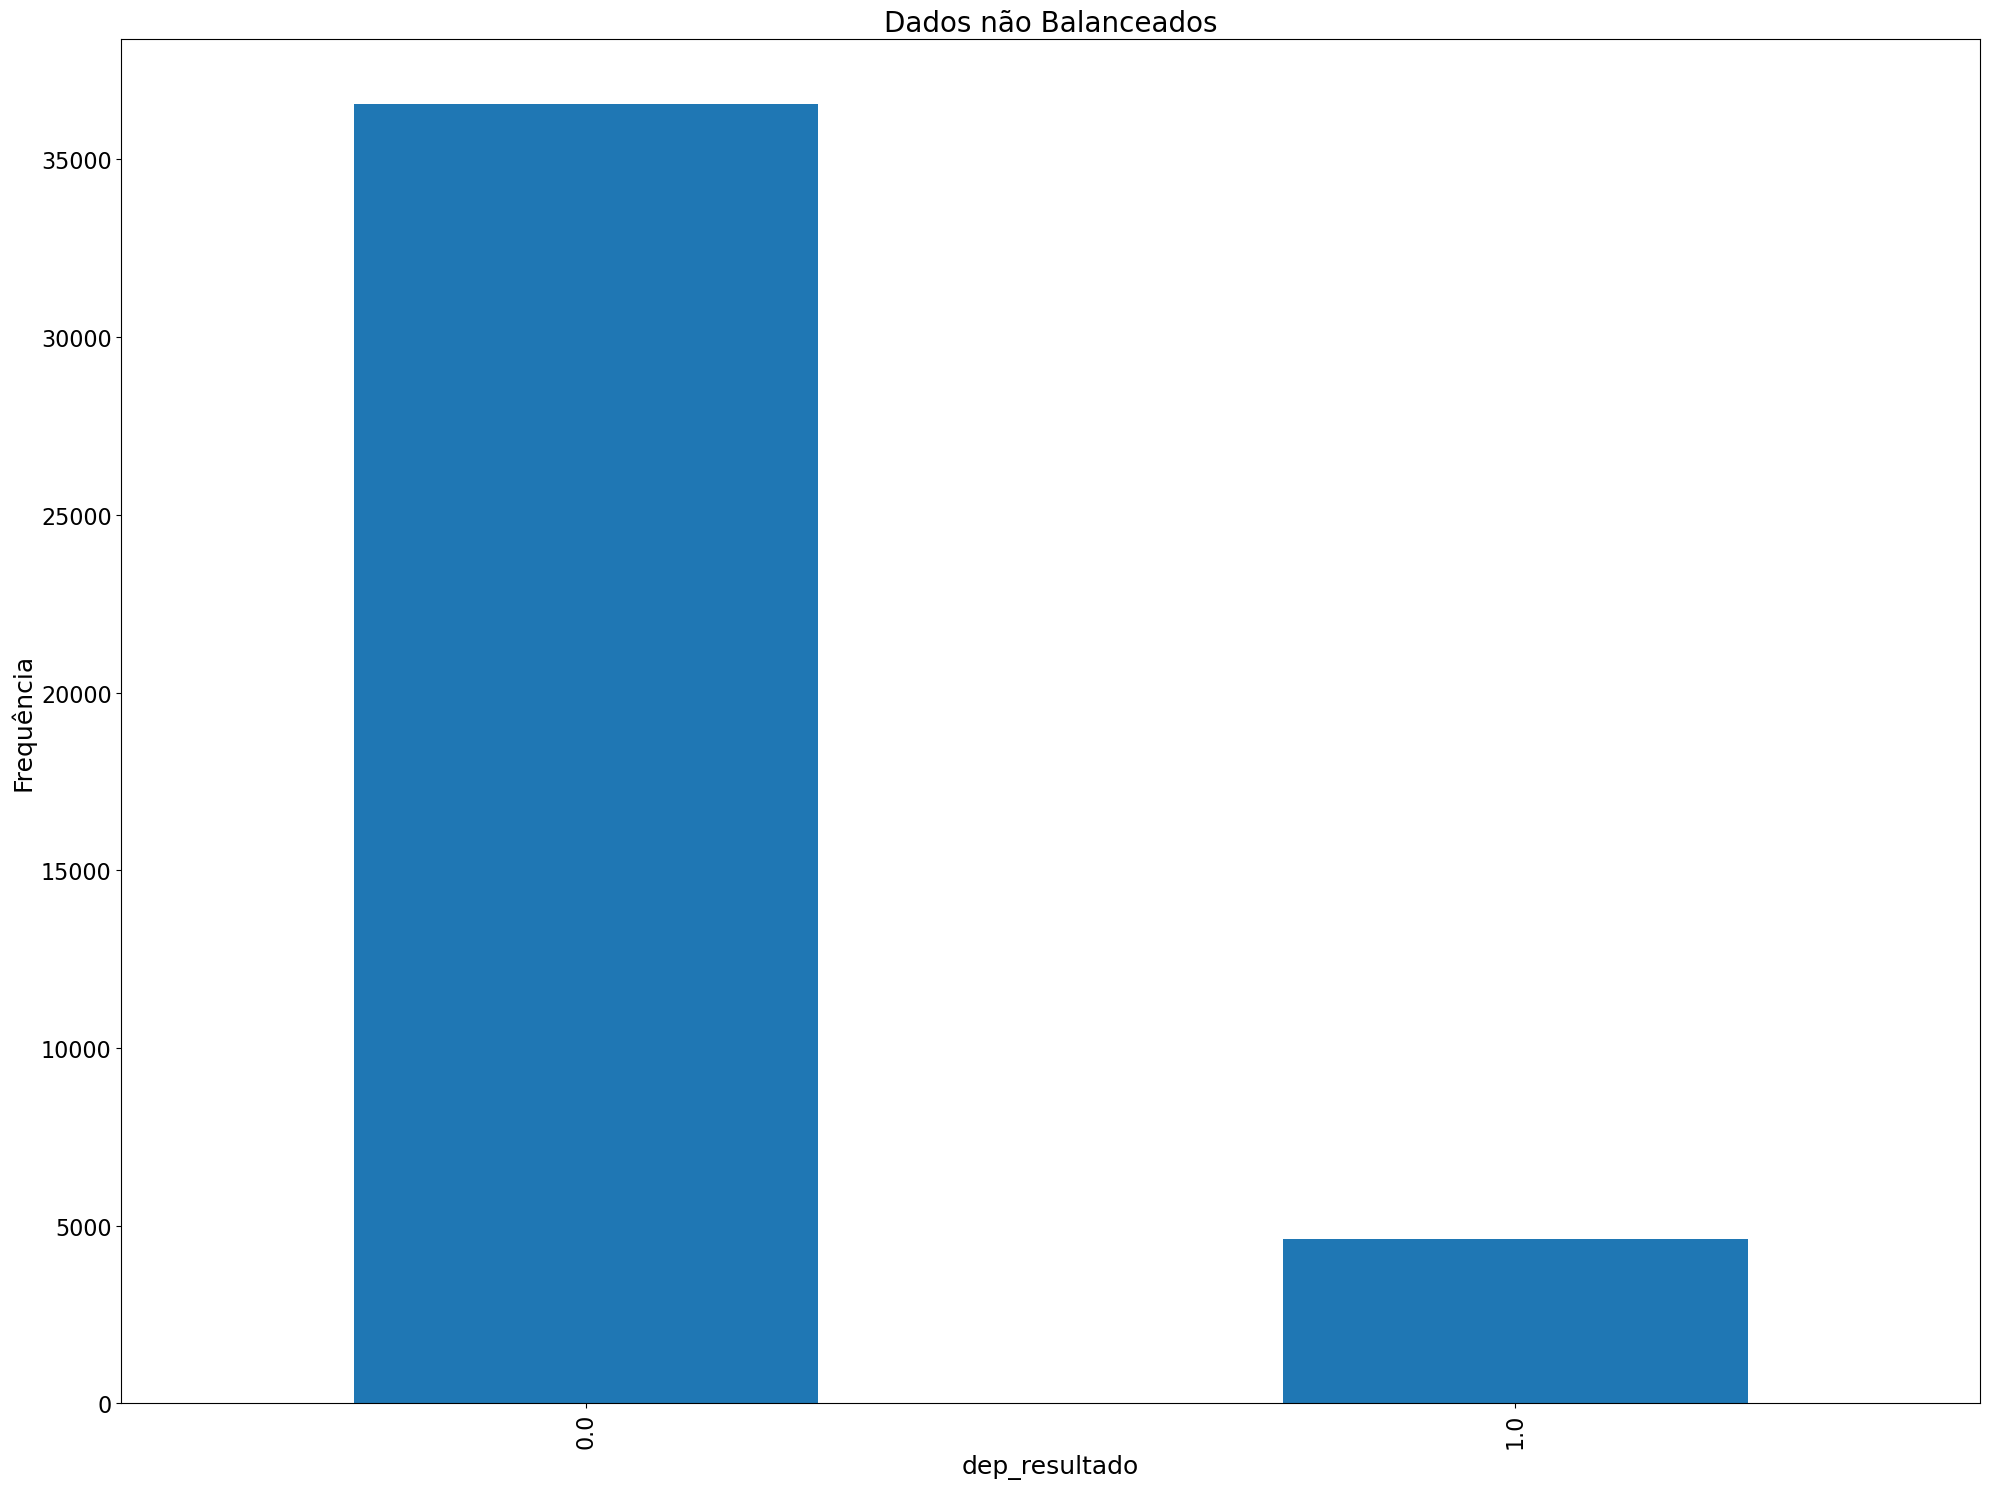

In [125]:
plt.rcParams["figure.figsize"] = [20, 15]
plt.rcParams["figure.autolayout"] = True
pd.value_counts(df['remainder__dep_resultado']).plot.bar()
plt.title('Dados não Balanceados',fontsize=20)
plt.xlabel('dep_resultado', fontsize=18)
plt.ylabel('Frequência', fontsize=18)
plt.tick_params(labelsize=16)

- Target: remainder__dep_resultado 

notamos que existe muita diferença entre dados 0 e 1

### Balanceamento de dados

In [128]:
from imblearn.over_sampling import SMOTE

#### igualando as amostras 

In [130]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)


C:\Users\games\AppData\Local\Temp\ipykernel_2616\3299610181.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(y).plot.bar()


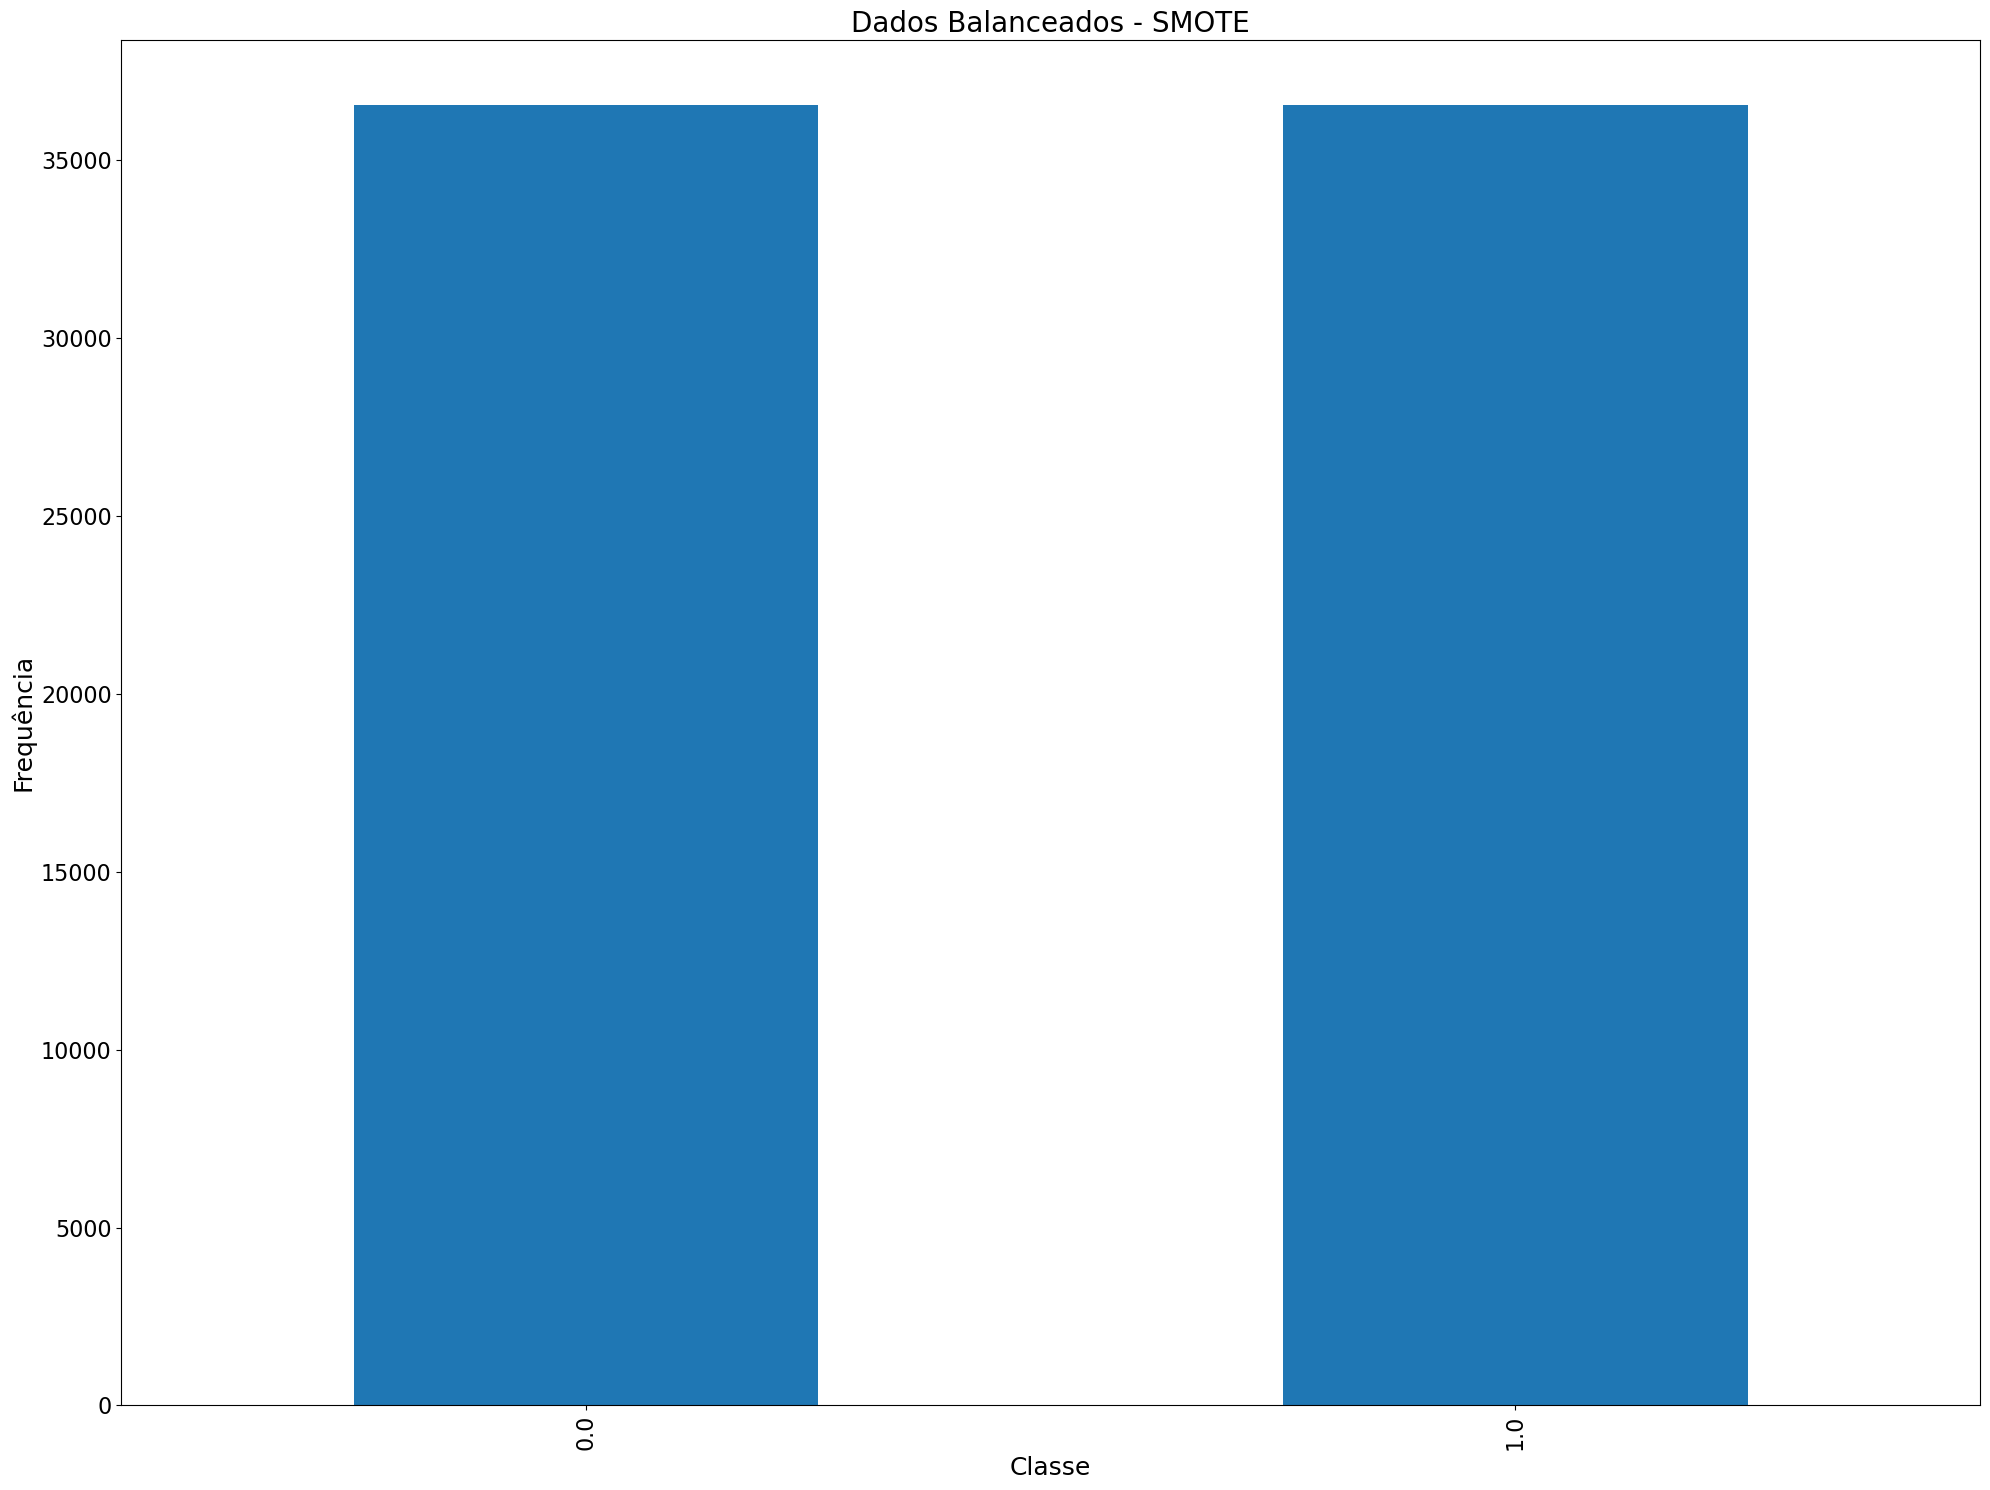

In [131]:

pd.value_counts(y).plot.bar()
plt.title('Dados Balanceados - SMOTE',fontsize=20)
plt.xlabel('Classe', fontsize=18)
plt.ylabel('Frequência', fontsize=18)
plt.tick_params(labelsize=16)

# Treinamento do modelo preditivo

## Separação aleatória de amostras de treinamento e teste

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,
shuffle= True)

## Instanciando o agoritmo KNN 

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

## Treinamento

In [138]:
# Prevendo os dados a partir da amostra (X_test)
knn_clf.fit(X_train, y_train)
y_prediction=knn_clf.predict(X_test)

### Avaliando o modelo

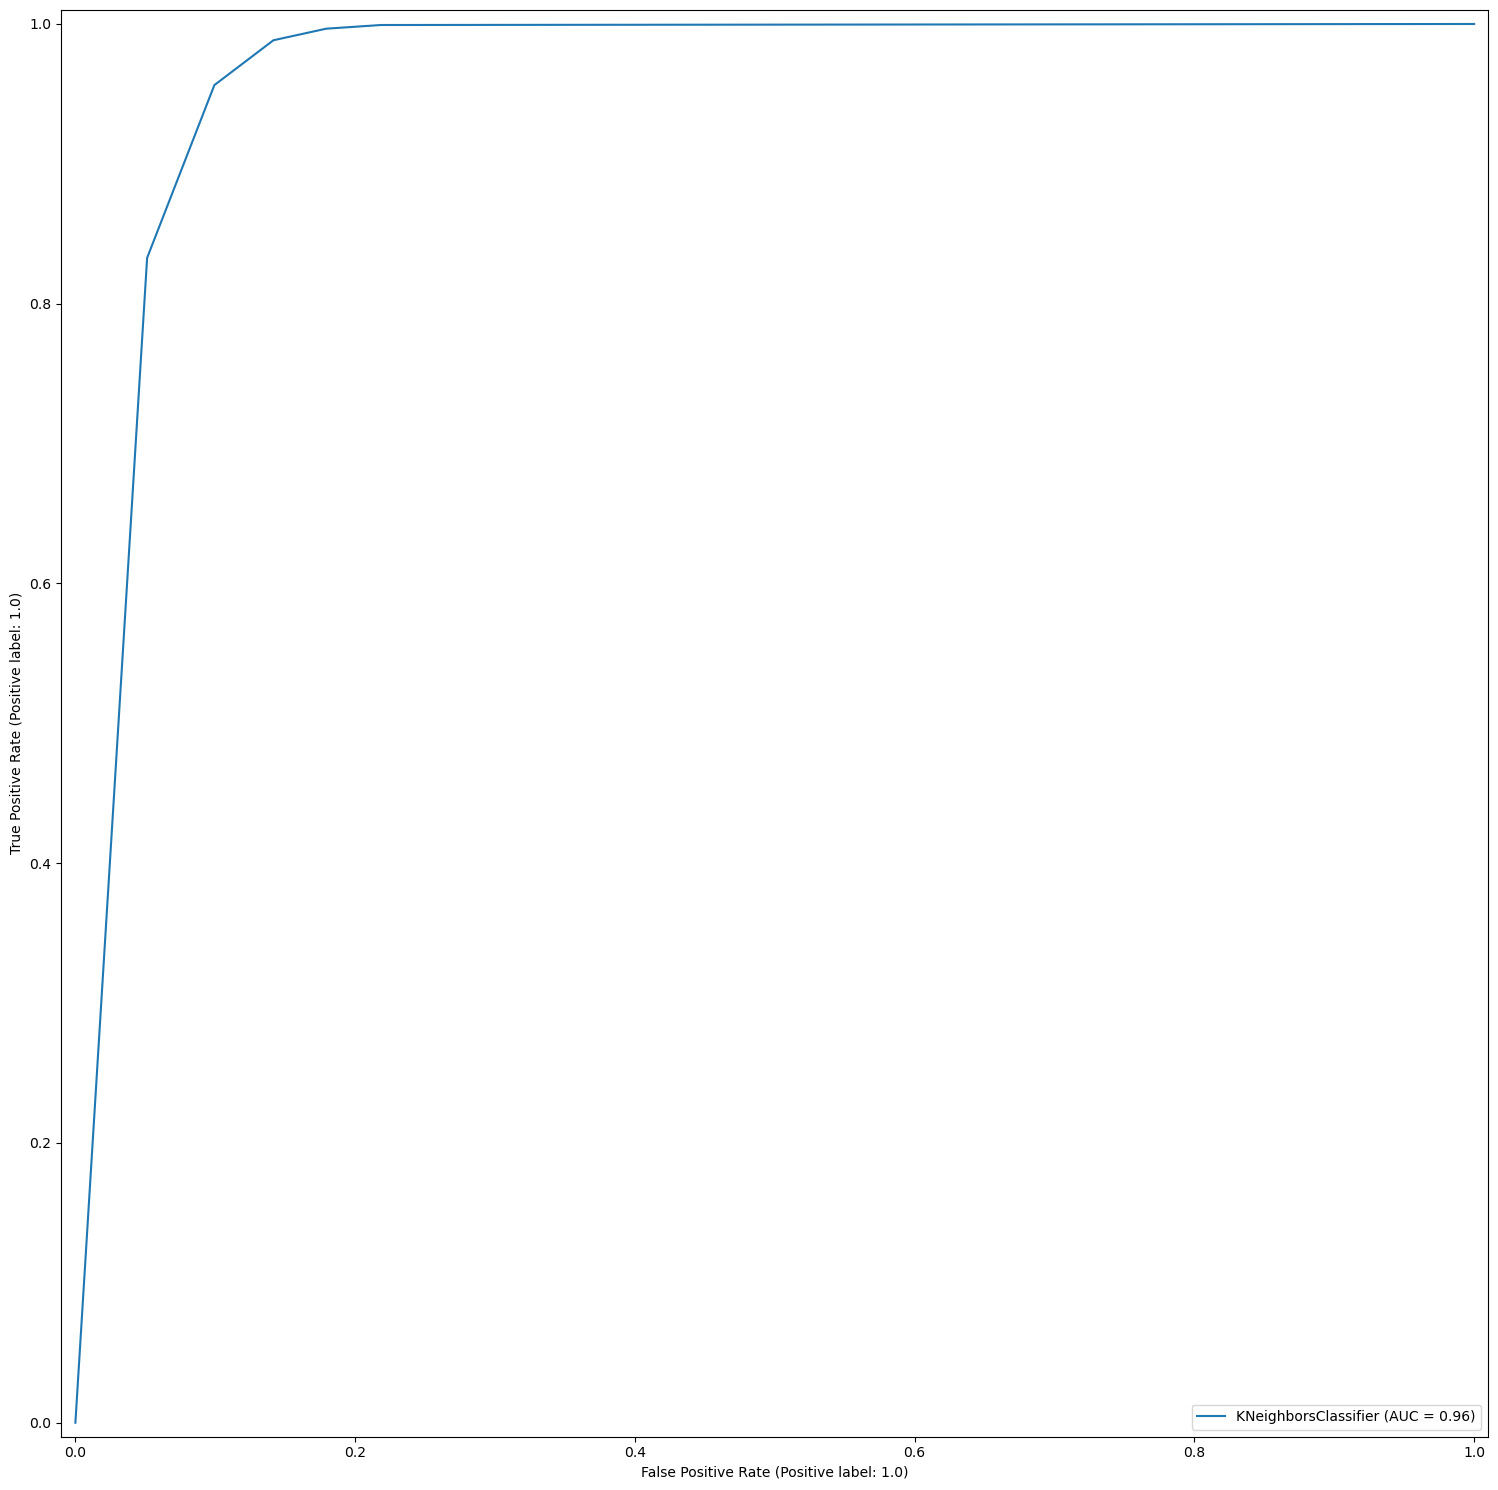

In [142]:
import matplotlib.pyplot as plt
#from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
#from sklearn.svm import SVC
#X, y = make_classification(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(
# X, y, random_state=0)
clf = knn_clf.fit(X_train, y_train)
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

Acuracidade do Algoritmo:  0.9236627297186374
Matriz de Confusão:
 [[ 9374  1546]
 [  128 10881]]


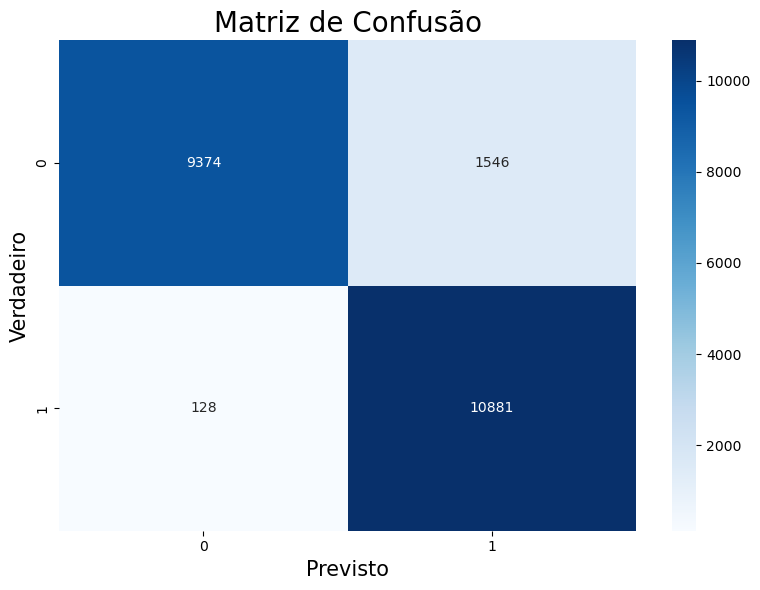

In [149]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Predições
y_pred = knn_clf.predict(X_test)

# Avaliação do modelo
print('Acuracidade do Algoritmo: ', accuracy_score(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", conf_matrix)

# Gráfico da Matriz de Confusão
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Matriz de Confusão', fontsize=20)
plt.ylabel('Verdadeiro', fontsize=15)
plt.xlabel('Previsto', fontsize=15)
plt.show()
